# American Census

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [2]:
# Data config
path_to_csv = "adult.csv"


## Load data

In [56]:
X_train_raw = pd.read_csv("X_train.csv")
y_train_raw = pd.read_csv("y_train.csv")

X_unknown_raw = pd.read_csv("X_test.csv")


## Helpers

In [47]:
# TODO

## Data exploration

### Question 1

In [48]:
# TODO

### Question 2

In [49]:
# TODO

## Data exploration

### Question 1

In [57]:
# Cleanup data
from sklearn.impute import SimpleImputer
from math import isnan

imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

imp.fit(X_train_raw)
X_train_imputed = imp.transform(X_train_raw)

imp.fit(X_unknown_raw)
X_unknown_imputed = imp.transform(X_unknown_raw)

### Question 2

In [58]:
from sklearn.preprocessing import OrdinalEncoder

X_train_enc = OrdinalEncoder().fit(X_train_imputed).transform(X_train_imputed)
X_unknown_enc = OrdinalEncoder().fit(X_unknown_imputed).transform(X_unknown_imputed)

### Question 3

In [60]:
from sklearn.preprocessing import StandardScaler

X_train_processed = StandardScaler().fit(X_train_enc).transform(X_train_enc)
X_unknown_processed = StandardScaler().fit(X_unknown_enc).transform(X_unknown_enc)

## Experiments

### Question 1

In [61]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C=10, kernel="poly", random_state=42),
    "LogisticRegression": LogisticRegression(C=10, penalty="none", random_state=42),
}

# Split
X_train, X_test, y_train, y_test = train_test_split(X_train_processed, y_train_raw, test_size=0.1, random_state=42, shuffle=True, stratify=y_train_raw)

### Question 2

GaussianNB, f1: 0.7929354668496325, acc: 0.7831695331695332
DecisionTreeClassifier, f1: 0.7838854210410874, acc: 0.7893120393120393
KNeighborsClassifier, f1: 0.7995791711405966, acc: 0.7997542997542998
SVM, f1: 0.8062021856147311, acc: 0.8212530712530712
LogisticRegression, f1: 0.7861212920985352, acc: 0.8034398034398035


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


(0.7, 0.9)

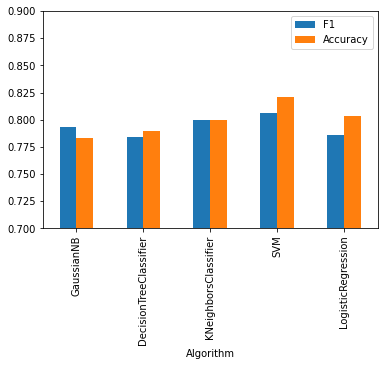

In [66]:
model_scores = []
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    prediction = model.predict(X_test)
    f1 = f1_score(y_test, prediction, average="weighted")
    acc = accuracy_score(y_test, prediction)
    model_scores.append([name, f1, acc])
    print(f"{name}, f1: {f1}, acc: {acc}")

%matplotlib inline
df = pd.DataFrame(model_scores, columns=["Algorithm", "F1", "Accuracy"])
axes = df.plot(x="Algorithm", y=["F1", "Accuracy"], kind="bar")
axes.set_ylim(0.7, 0.9)

### Question 3

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))

model_parameters = {
    "GaussianNB": {},
    "DecisionTreeClassifier": {
        'max_depth': [None, 2, 5, 10],
        'min_samples_leaf': [2],
        'random_state': [random_state]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3],
        'weights': ['distance']
    },
    'LogisticRegression':{
        'C': [1, 10, 100],
        'penalty': ['none', 'l1', 'l2'],
        'random_state': [42]
    },
    'SVM': {
        'C': [1, 10, 100],
        'kernel': ['poly', 'rbf'],
        'random_state': [random_state]
    }
}


for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(X_train_processed, y_train_raw.values.ravel())
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best parameters:")
    for k,v in best_params.items():
        print("-", k, v)

### Question 4

In [63]:
#TODO

### Question 5

In [65]:
# TODO: Pick our favourite algo and hyper params
final_model = SVC(C=10, kernel="rbf", random_state=42)
final_model.fit(X_train, y_train.values.ravel())
prediction = final_model.predict(X_unknown_processed)
print(prediction)
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)

[0 0 0 ... 0 0 0]
